In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
df_filepath = "..\\dataset\\new dataset.xlsx"
og_df = pd.read_excel(df_filepath)
print(og_df.head())

   Year  Month  Day Weekend?    Hour Collision Type         Injury Type  \
0  2015      1    5  Weekday     0.0          2-Car   No injury/unknown   
1  2015      1    6  Weekday  1500.0          2-Car   No injury/unknown   
2  2015      1    6  Weekend  2300.0          2-Car  Non-incapacitating   
3  2015      1    7  Weekend   900.0          2-Car  Non-incapacitating   
4  2015      1    7  Weekend  1100.0          2-Car   No injury/unknown   

                          Primary Factor      Reported_Location   Latitude  \
0  OTHER (DRIVER) - EXPLAIN IN NARRATIVE             1ST & FESS  39.159207   
1                  FOLLOWING TOO CLOSELY          2ND & COLLEGE  39.161440   
2              DISREGARD SIGNAL/REG SIGN  BASSWOOD & BLOOMFIELD  39.149780   
3          FAILURE TO YIELD RIGHT OF WAY         GATES & JACOBS  39.165655   
4          FAILURE TO YIELD RIGHT OF WAY                  W 3RD  39.164848   

   Longitude  
0 -86.525874  
1 -86.534848  
2 -86.568890  
3 -86.575956  
4 -86

# df Cleaning
**Feature Selection**
Provided columns are 'Year', 'Month', 'Day', 'Weekend?', 'Hour', 'Collision Type', 'Injury Type','Primary Factor', 'Reported_Location', 'Latitude', 'Longitude'. We will drop 'Collision Type', 'Injury Type', and 'Primary Factor' since these values will not help us determine whether or not an accident will happen (because these features only exist in the case that an accident does occur). We will also drop 'Year' since we want our model to generalize to any given year.

**Removing Rows with Empty Values**
We will also drop any rows with empty values in the selected features

In [7]:
df = og_df.drop(columns=['Year', 'Primary Factor', 'Collision Type', 'Injury Type'])
df = df.dropna()
print(df.head())

   Month  Day Weekend?    Hour      Reported_Location   Latitude  Longitude
0      1    5  Weekday     0.0             1ST & FESS  39.159207 -86.525874
1      1    6  Weekday  1500.0          2ND & COLLEGE  39.161440 -86.534848
2      1    6  Weekend  2300.0  BASSWOOD & BLOOMFIELD  39.149780 -86.568890
3      1    7  Weekend   900.0         GATES & JACOBS  39.165655 -86.575956
4      1    7  Weekend  1100.0                  W 3RD  39.164848 -86.579625


# Normalizing Data
**Normalizing Hours**

Disregarding decimal points, Hour values are currently 3-4 characters with the least significant 2 digits being minutes (always 00 in this dataset) and the remaining significant bits denoting hours. We will remove decimal point and remove minutes integers so that the only remaining number is what number hour it is (from 0 to 23).

In [8]:
# We must normalize all values in hour column such that it is 4 integers indicating the format (HH:MM)
df['Hour'] = df['Hour'].astype(int).astype(str).str.zfill(4)

# get just the HH values (indicates which of the 24 buckets the value goes into)
df['Hour'] = df['Hour'].str[:2].astype(int)

print(df)

       Month  Day Weekend?  Hour      Reported_Location   Latitude  Longitude
0          1    5  Weekday     0             1ST & FESS  39.159207 -86.525874
1          1    6  Weekday    15          2ND & COLLEGE  39.161440 -86.534848
2          1    6  Weekend    23  BASSWOOD & BLOOMFIELD  39.149780 -86.568890
3          1    7  Weekend     9         GATES & JACOBS  39.165655 -86.575956
4          1    7  Weekend    11                  W 3RD  39.164848 -86.579625
...      ...  ...      ...   ...                    ...        ...        ...
53938     10    6  Weekday    17  DUNN & WHITE LOT WEST   0.000000   0.000000
53939     11    3  Weekday     8        RED OAK & SR446   0.000000   0.000000
53940     12    5  Weekday    12        2ND ST & WALNUT   0.000000   0.000000
53941     12    1  Weekend     7         NINETH & NORTH   0.000000   0.000000
53942     12    7  Weekend    17      MONROW & THIRD ST   0.000000   0.000000

[53660 rows x 7 columns]


**Encoding Weekend**

Encode "yes weekend" to 1 and "no weekend" to 0 so we can use this feature in our neural network

In [9]:
# One-hot encode the 'weekend' variable
one_hot_encoded = pd.get_dummies(df['Weekend?'], prefix='weekend?').astype(int)

# Concatenate the one-hot encoded columns with the original DataFrame
df = pd.concat([df, one_hot_encoded], axis=1)

# Drop the original 'weekend' column if needed
df.drop('Weekend?', axis=1, inplace=True)

print(df)

       Month  Day  Hour      Reported_Location   Latitude  Longitude  \
0          1    5     0             1ST & FESS  39.159207 -86.525874   
1          1    6    15          2ND & COLLEGE  39.161440 -86.534848   
2          1    6    23  BASSWOOD & BLOOMFIELD  39.149780 -86.568890   
3          1    7     9         GATES & JACOBS  39.165655 -86.575956   
4          1    7    11                  W 3RD  39.164848 -86.579625   
...      ...  ...   ...                    ...        ...        ...   
53938     10    6    17  DUNN & WHITE LOT WEST   0.000000   0.000000   
53939     11    3     8        RED OAK & SR446   0.000000   0.000000   
53940     12    5    12        2ND ST & WALNUT   0.000000   0.000000   
53941     12    1     7         NINETH & NORTH   0.000000   0.000000   
53942     12    7    17      MONROW & THIRD ST   0.000000   0.000000   

       weekend?_Weekday  weekend?_Weekend  
0                     1                 0  
1                     1                 0  
2  

# Finding Outliers

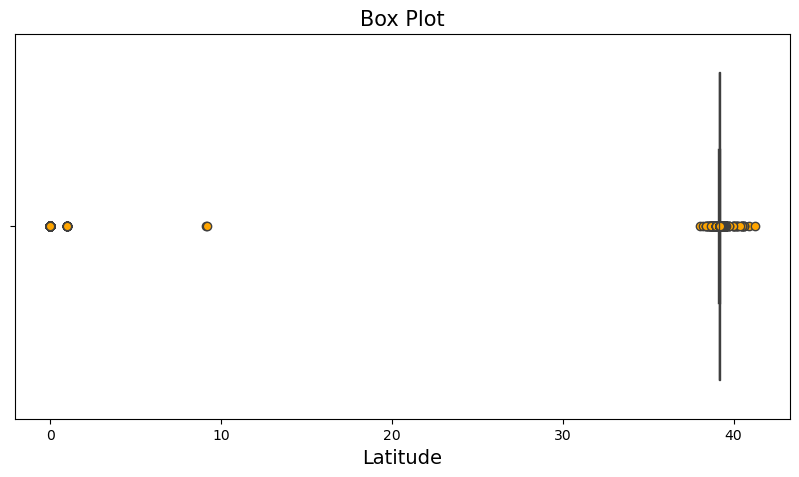

0.0 41.22866547


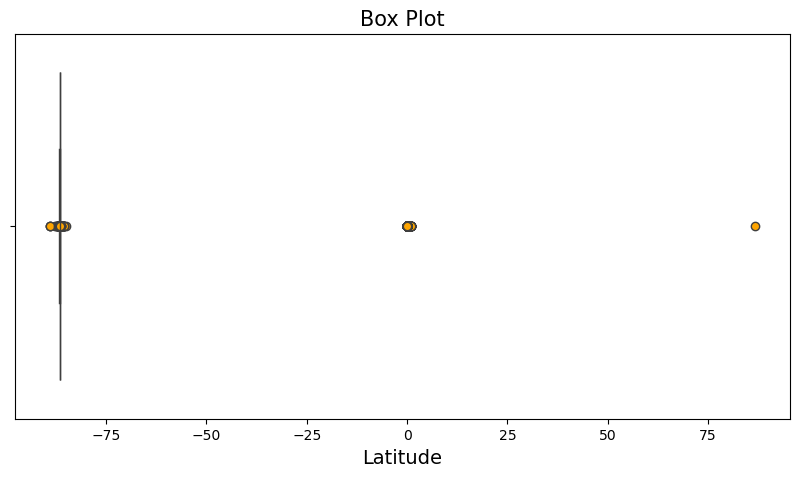

0.0 41.22866547


In [10]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df['Latitude'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('Latitude', fontsize=14)
plt.show()

print(df['Latitude'].min(), df['Latitude'].max())

fig = plt.figure(figsize=(10,5))
sns.boxplot(x = df['Longitude'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('Latitude', fontsize=14)
plt.show()
print(df['Latitude'].min(), df['Latitude'].max())

In [12]:
mean_longitude = df['Longitude'].mean()
std_longitude = df['Longitude'].std()
threshold = 2 * std_longitude

# Create a boolean mask to identify rows where "Longitude" is within the threshold
mask = (df['Longitude'] >= (mean_longitude - threshold)) & (df['Longitude'] <= (mean_longitude + threshold))
# apply mask
filtered_df = df[mask]

mean_latitude = df['Latitude'].mean()
std_latitude = df['Latitude'].std()
threshold = 2 * std_latitude

# Create a boolean mask to identify rows where "Longitude" is within the threshold
mask = (filtered_df['Latitude'] >= (mean_latitude - threshold)) & (filtered_df['Latitude'] <= (mean_latitude + threshold))
# apply mask
filtered_df = filtered_df[mask]

print(df.shape)
# Print the filtered DataFrame
print(filtered_df.shape)

(53660, 8)
(48781, 8)


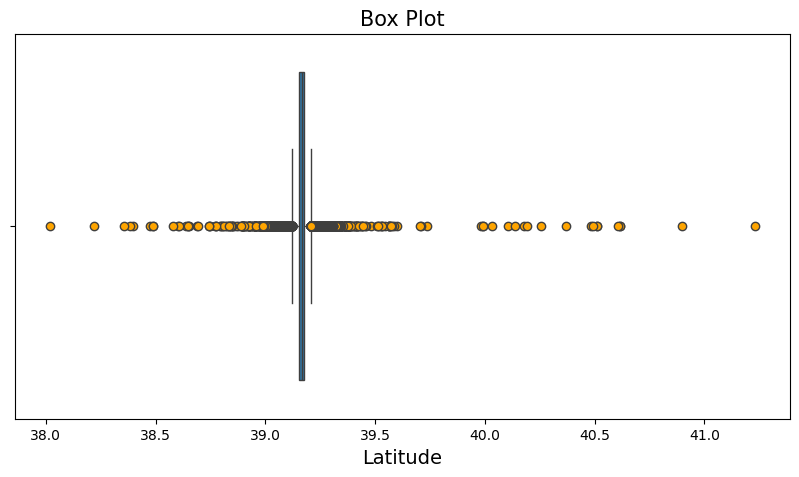

38.01932812 41.22866547


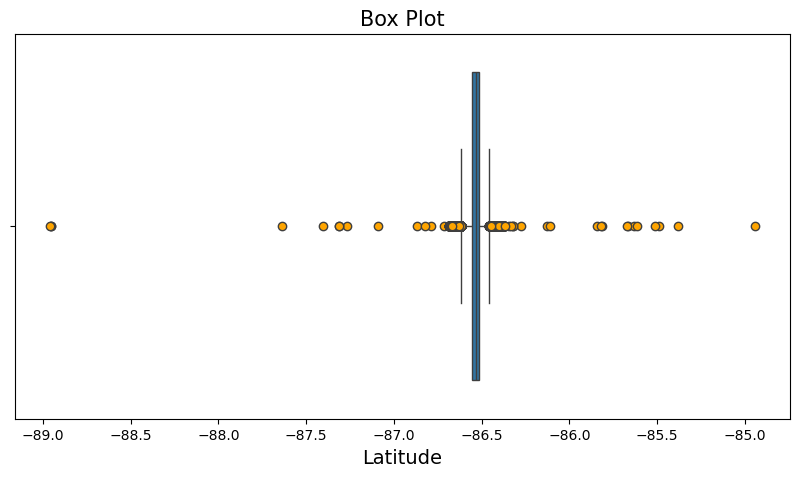

38.01932812 41.22866547


In [13]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x = filtered_df['Latitude'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('Latitude', fontsize=14)
plt.show()

print(filtered_df['Latitude'].min(), filtered_df['Latitude'].max())

fig = plt.figure(figsize=(10,5))
sns.boxplot(x = filtered_df['Longitude'], flierprops = dict(markerfacecolor = 'orange', marker = 'o'))
plt.title('Box Plot', fontsize=15)
plt.xlabel('Latitude', fontsize=14)
plt.show()
print(filtered_df['Latitude'].min(), filtered_df['Latitude'].max())

# Save Modified Data

Will save modified data to a CSV file for use by our model

In [14]:
filtered_df.to_csv('.\\modified_data\\cleaned_data.csv', index=False)